![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [2]:

filename_features = "./Dados/UCI_HAR_Dataset/features.txt"
filename_labels = "./Dados/UCI_HAR_Dataset/activity_labels.txt"

filename_subtrain = "./Dados/UCI_HAR_Dataset/train/subject_train.txt"
filename_xtrain = "./Dados/UCI_HAR_Dataset/train/X_train.txt"
filename_ytrain = "./Dados/UCI_HAR_Dataset/train/y_train.txt"

filename_subtest = "./Dados/UCI_HAR_Dataset/test/subject_test.txt"
ffilename_xtest = "./Dados/UCI_HAR_Dataset/test/X_test.txt"
filename_ytest = "./Dados/UCI_HAR_Dataset/test/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

/tmp/ipykernel_6700/3832768921.py:12: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
/tmp/ipykernel_6700/3832768921.py:15: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
/tmp/ipykernel_6700/3832768921.py:19: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)


## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

In [3]:
def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
X_train_pad.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.200628,-0.063678,-0.419600,-0.868755,-0.939377,-0.737479,-0.859758,-0.938955,-0.766385,-0.855978,...,-0.795305,0.025958,-0.276380,-0.360579,0.062935,-0.778374,-0.026079,-0.687172,0.407918,-0.007567
1,0.055944,0.031484,-0.253891,-0.875366,-0.923839,-0.849247,-0.868472,-0.921936,-0.848870,-0.871300,...,0.130605,-0.897296,-0.767938,0.133002,-0.021460,-1.218722,1.484369,-0.694091,0.409089,0.007875
2,0.073510,-0.043414,-0.076289,-0.868980,-0.907698,-0.893724,-0.863078,-0.898793,-0.896640,-0.863264,...,1.152257,-0.260860,-0.438286,-0.377815,0.391949,0.151197,1.704085,-0.702191,0.410260,0.026501
3,0.066691,-0.208407,-0.249695,-0.870566,-0.939959,-0.921743,-0.864445,-0.938060,-0.925216,-0.863264,...,1.112694,0.591005,0.463123,-0.135016,-0.033635,1.037781,-1.002951,-0.701636,0.414622,0.031712
4,0.030467,0.027585,-0.109840,-0.875128,-0.934815,-0.921281,-0.867325,-0.931726,-0.927965,-0.870201,...,-0.149567,-0.138505,-0.240296,0.340383,0.268468,1.125841,-1.276196,-0.700104,0.425434,0.045222


In [4]:
pca = PCA().fit(X_train)
pca_pad = PCA().fit(X_train_pad)

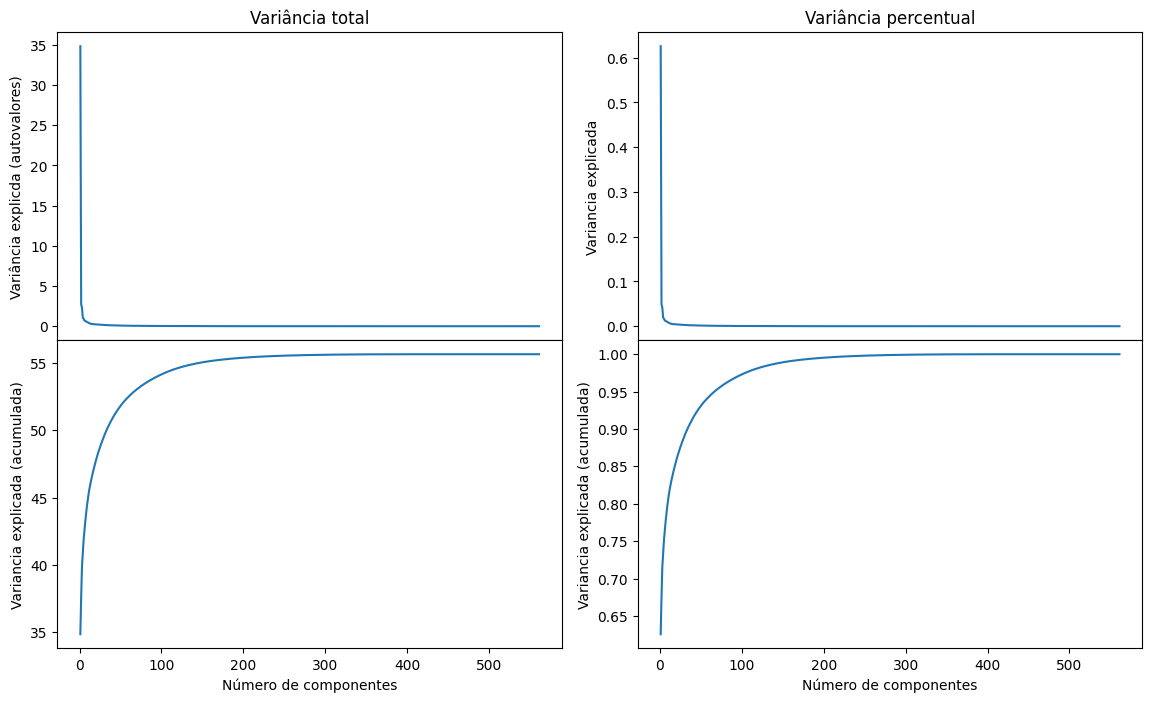

In [5]:
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14,8))
plt.subplots_adjust(hspace=0, wspace=.15)

n_components = np.arange(1, pca.n_components_ + 1)

ax[0, 0].plot(n_components, pca.explained_variance_)
ax[0, 0].set_title('Variância total')
ax[0, 0].set_ylabel('Variância explicda (autovalores)')
ax[0, 0].set_xlabel('Número de componentes')

ax[1, 0].plot(n_components, pca.explained_variance_.cumsum())
ax[1, 0].set_xlabel('Número de componentes')
ax[1, 0].set_ylabel('Variancia explicada (acumulada)')

ax[0, 1].plot(n_components, pca.explained_variance_ratio_)
ax[0, 1].set_title('Variância percentual')
ax[0, 1].set_xlabel('Número de componentes')
ax[0, 1].set_ylabel('Variancia explicada')

ax[1, 1].plot(n_components, pca.explained_variance_ratio_.cumsum())
ax[1, 1].set_xlabel('Número de componentes')
ax[1, 1].set_ylabel('Variancia explicada (acumulada)')

plt.show()

In [6]:
cum_expl_var_ratio = pca.explained_variance_ratio_.cumsum()
n_comp_to_90 = 0
for i, expl_var in enumerate(cum_expl_var_ratio):
    if expl_var >= .9:
        n_comp_to_90 = i + 1
        break
print(f'Sem a padronização, foram necessárias {n_comp_to_90} de {n_components[-1]} componentes principais para explicar 90% da variância dos dados.')

Sem a padronização, foram necessárias 34 de 561 componentes principais para explicar 90% da variância dos dados.


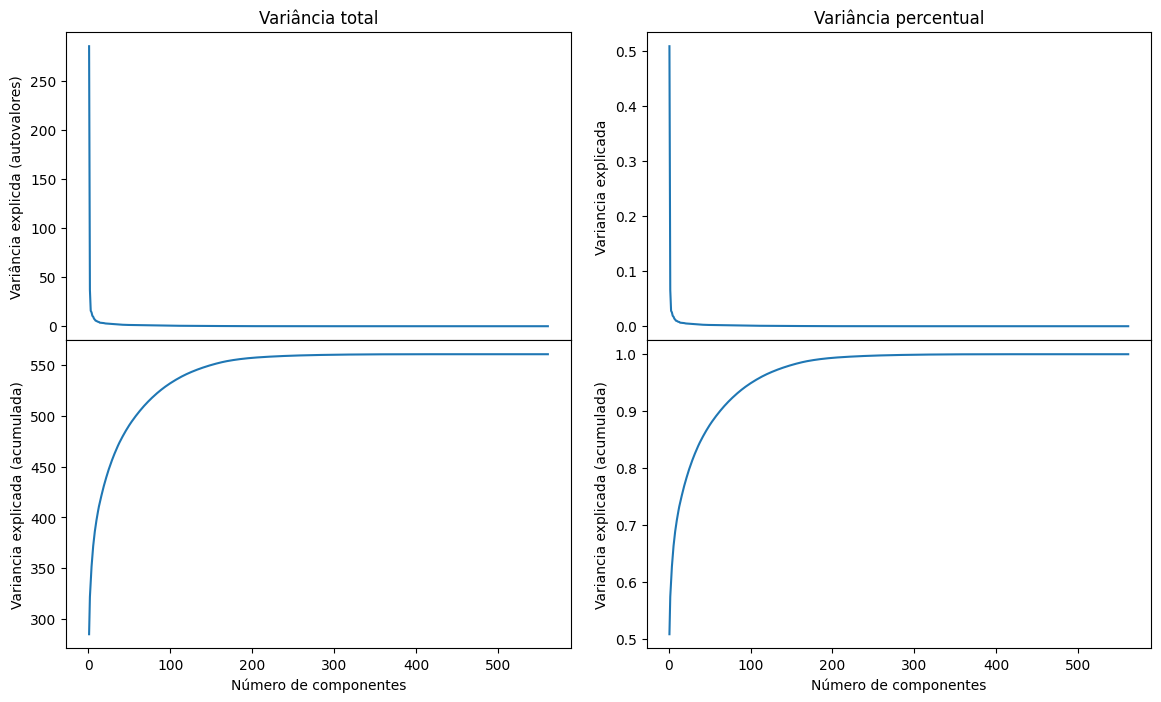

In [7]:
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14,8))
plt.subplots_adjust(hspace=0, wspace=.15)

n_components = np.arange(1, pca_pad.n_components_ + 1)

ax[0, 0].plot(n_components, pca_pad.explained_variance_)
ax[0, 0].set_title('Variância total')
ax[0, 0].set_ylabel('Variância explicda (autovalores)')
ax[0, 0].set_xlabel('Número de componentes')

ax[1, 0].plot(n_components, pca_pad.explained_variance_.cumsum())
ax[1, 0].set_xlabel('Número de componentes')
ax[1, 0].set_ylabel('Variancia explicada (acumulada)')

ax[0, 1].plot(n_components, pca_pad.explained_variance_ratio_)
ax[0, 1].set_title('Variância percentual')
ax[0, 1].set_xlabel('Número de componentes')
ax[0, 1].set_ylabel('Variancia explicada')

ax[1, 1].plot(n_components, pca_pad.explained_variance_ratio_.cumsum())
ax[1, 1].set_xlabel('Número de componentes')
ax[1, 1].set_ylabel('Variancia explicada (acumulada)')

plt.show()

In [8]:
cum_expl_var_ratio = pca_pad.explained_variance_ratio_.cumsum()
n_comp_to_90 = 0
for i, expl_var in enumerate(cum_expl_var_ratio):
    if expl_var >= .9:
        n_comp_to_90 = i + 1
        break
print(f'Com a padronização, foram necessárias {n_comp_to_90} de {n_components[-1]} componentes principais para explicar 90% da variância dos dados.')

Com a padronização, foram necessárias 63 de 561 componentes principais para explicar 90% da variância dos dados.


## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

In [9]:
X_train_pca = pca.transform(X_train)[:, :10]
X_train_pca_pad = pca_pad.transform(X_train_pad)[:, :10]

X_test_pad = pd.DataFrame(X_test).apply(padroniza, axis=0)
X_test_pca = pca.transform(X_test)[:, :10]
X_test_pca_pad = pca_pad.transform(X_test_pad)[:, :10]

#X_train_pca.shape

clf = DecisionTreeClassifier(ccp_alpha=0.001).fit(X_train_pca, y_train)
clf_pad = DecisionTreeClassifier(ccp_alpha=0.001).fit(X_train_pca_pad, y_train)

In [13]:
y_pred = clf.predict(X_test_pca)
y_pred_pad = clf_pad.predict(X_test_pca_pad)

print(f'Acurácia sem padronização: {accuracy_score(y_pred, y_test) * 100: .2f} %')
print(f'Acurácia com padronização: {accuracy_score(y_pred_pad, y_test) * 100: .2f} %')

Acurácia sem padronização:  82.42 %
Acurácia com padronização:  77.37 %


A acurácia diminuiu levemente com a padronização!